<a href="https://colab.research.google.com/github/AngelB26/Data-Analysis-Visualizations/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline

In [2]:
data=pd.read_csv('/content/Zomato-data-.csv')

In [3]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
#let’s convert the data type of the “rate” column to float and remove the denominator

In [5]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)
data['rate']=data['rate'].apply(handleRate)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
data.info()#to obtain a summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
#there is no null values in dataset.

In [7]:
data.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


Text(0.5, 0, 'Type of restaurant')

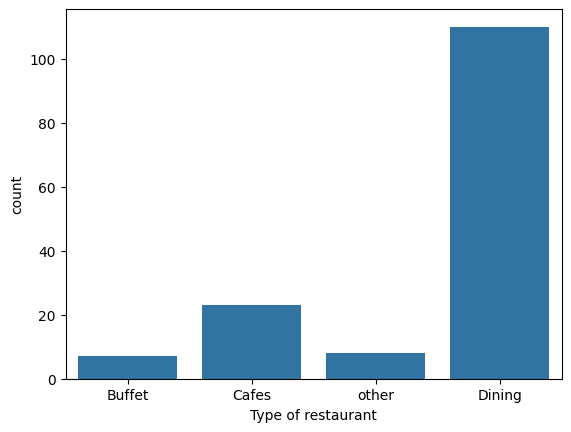

In [8]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of restaurant")

In [ ]:
#The majority of the restaurants fall into the dining category

Text(0, 0.5, 'Votes')

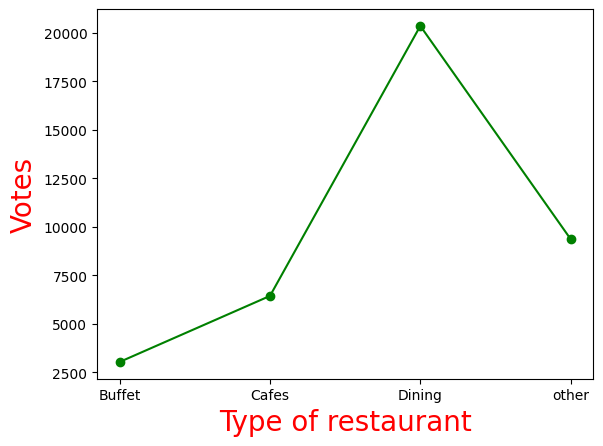

In [9]:
grouped_data=data.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel("Type of restaurant",c='red',size=20)
plt.ylabel("Votes",c='red',size=20)

In [ ]:
#Dining restaurants are preferred by a larger number of individuals.

In [ ]:
#determine the restaurant’s name that received the maximum votes based on a given dataframe

In [10]:
max_votes=data['votes'].max()
restuarant_with_max_votes=data.loc[data['votes']==max_votes,'name']
print('Restaurant(s) with maximum votes are: ')
print(restuarant_with_max_votes)

Restaurant(s) with maximum votes are: 
38    Empire Restaurant
Name: name, dtype: object


In [ ]:
#now let's explore the online_order column

Text(0.5, 0, 'Online order')

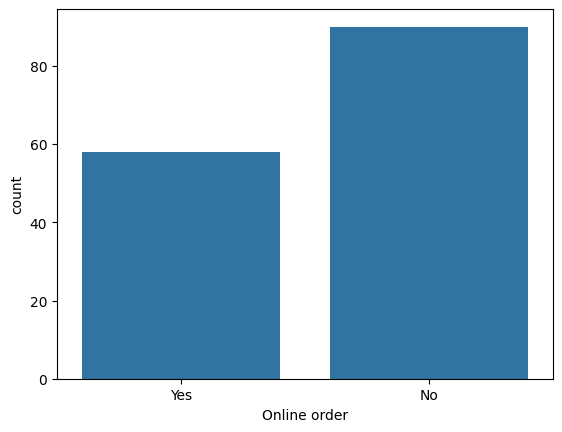

In [12]:
sns.countplot(x=data['online_order'])
plt.xlabel("Online order")

In [ ]:
#This suggests that a majority of the restaurants do not accept online orders.

In [ ]:
#now explore the rate column

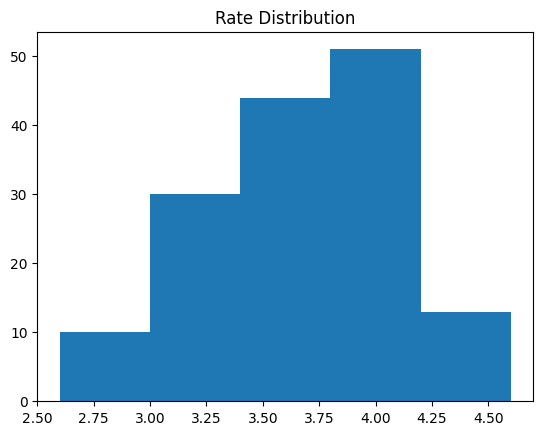

In [13]:
plt.hist(data['rate'],bins=5)
plt.title('Rate Distribution')
plt.show()

In [ ]:
#The majority of restaurants received ratings ranging from 3.5 to 4

In [ ]:
#explore the approx_cost(for two people) column

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

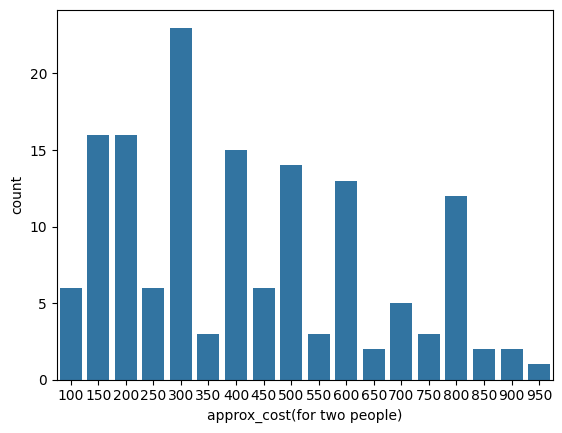

In [14]:
couple_data=data['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [ ]:
#The majority of couples prefer restaurants with an approximate cost of 300 rupees.

In [ ]:
#Now we will examine whether online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

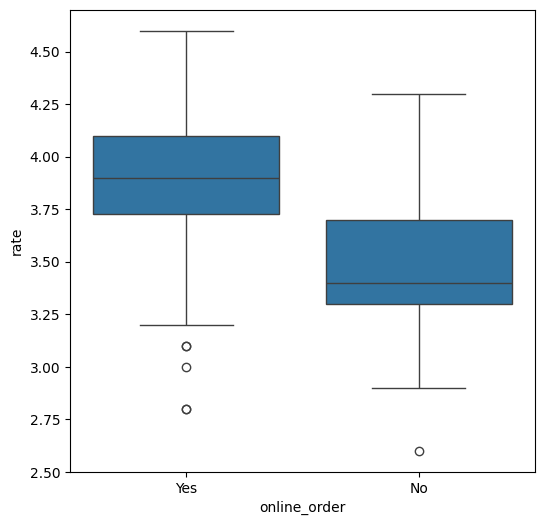

In [15]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

In [ ]:
#Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

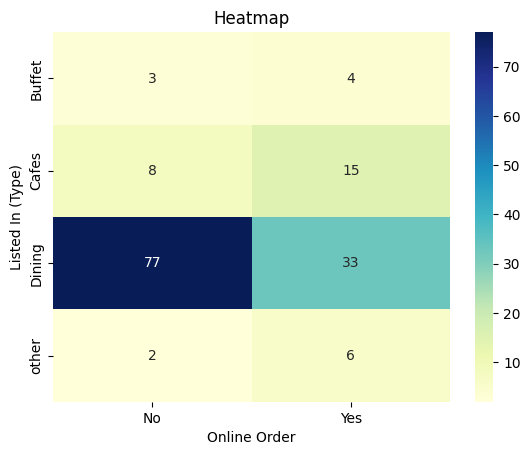

In [17]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

In [ ]:
#Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes